In [16]:
# first let's make sure you have internet enabled
import requests
requests.get('http://www.google.com',timeout=10).ok

True

In [18]:
%%capture
# ensure we are on the latest version of kaggle-environments
%pip install --upgrade kaggle-environments

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached kaggle_environments-1.16.11-py2.py3-none-any.whl.metadata (10 kB)
  Using cached gymnasium-0.29.0-py3-none-any.whl.metadata (10 kB)
  Using cached pettingzoo-1.24.0-py3-none-any.whl.metadata (8.1 kB)
  Using cached Shimmy-2.0.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached stable_baselines3-2.1.0-py3-none-any.whl.metadata (5.2 kB)
  Using cached transformers-4.48.0-py3-none-any.whl.metadata (44 kB)
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
  Using cached Shimmy-1.3.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached huggingface_hub-0.27.1-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.5.2-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached kaggle

In [40]:
# Now let's set up the chess environment!
from kaggle_environments import make
env = make("chess", debug=True)

# Reinicia o ambiente com a FEN string inicial desejada
initial_fen = "8/8/8/3k4/8/3K4/3P4/8 w - - 0 1"
env.reset()


AttributeError: 'Environment' object has no attribute '__set_state'


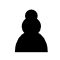
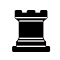
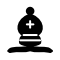
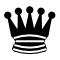
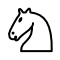
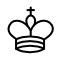
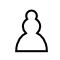
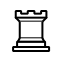
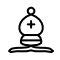
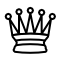
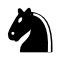
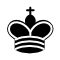

In [26]:
# this should run a game in the environment between two random bots
# NOTE: each game starts from a randomly selected opening
result = env.run(["random", "random"])
env.render(mode="ipython", width=1000, height=1000) 

In [21]:
%%writefile main.py
from Chessnut import Game
import random

def chess_bot(obs):
    """
    Simple chess bot that prioritizes checkmates, then captures, queen promotions, then randomly moves.

    Args:
        obs: An object with a 'board' attribute representing the current board state as a FEN string.

    Returns:
        A string representing the chosen move in UCI notation (e.g., "e2e4")
    """
    # 0. Parse the current board state and generate legal moves using Chessnut library
    game = Game(obs.board)
    moves = list(game.get_moves())

    # 1. Check a subset of moves for checkmate
    for move in moves[:10]:
        g = Game(obs.board)
        g.apply_move(move)
        if g.status == Game.CHECKMATE:
            return move

    # 2. Check for captures
    for move in moves:
        if game.board.get_piece(Game.xy2i(move[2:4])) != ' ':
            return move

    # 3. Check for queen promotions
    for move in moves:
        if "q" in move.lower():
            return move

    # 4. Random move if no checkmates or captures
    return random.choice(moves)

Writing main.py


Agent exit status/reward/time left: 
	 DONE / 0.5 / 9.959556
	 DONE / 0.5 / 10





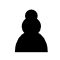
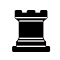
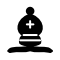
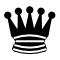
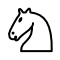
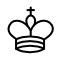
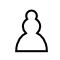
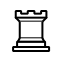
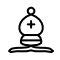
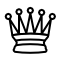
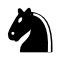
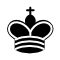

In [ ]:
result = env.run(["main.py", "random"])
print("Agent exit status/reward/time left: ")
# look at the generated replay.json and print out the agent info
for agent in result[-1]:
    print("\t", agent.status, "/", agent.reward, "/", agent.observation.remainingOverageTime)
print("\n")
# render the game
env.render(mode="ipython", width=500, height=500) 